In [273]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math as math
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [274]:
firms = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/firm_names.xlsx')
scores = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/Soc.xlsx', index_col = 0)
returns = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/monthlyreturns.xlsx', index_col = 0)
market_values = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/size.xlsx', index_col=0)
eu_countrycodes = ['AL','AD', 'AM','AT','BA','BE','BG','CH','CY','DE','DK','EE','ES','FI','FR','GE', 'GB','GR','HR','HU','IE','IS','IT','LT','LV','MC','MK','MT','NL','NO','PL','PT','RO','RS', 'RU','SE','SI', 'TR', 'UA', 'MD', 'LI']

# Data cleaning and selection
Transposing table to get firms as rows, reset columns to dates

In [275]:
scores = scores.transpose()
scores.index.rename('ISIN', inplace=True)

firms.set_index("ISIN", inplace=True)

Join Social scores to firm's names and locations
Filter on firms that are located in Europe.
Variable  `eu_firm_names` containes the relevant firm names for our analysis.

In [276]:
scores = scores.join(firms, how="left", on="ISIN")
scores = scores[scores["Country"].isin(eu_countrycodes)]

Remove firms with unusual data:
- GB00B45TWN62 all empty or NaN
- GB00B979H674 NaN, 0 and one valid datapoint)
- DE000A2YPGA9 Only traded recently with abnormaly high volatility
- IE00BLNN3691 (Weatherford International Ltd. Equity) has a weird extremely high return in end 2019. WILL KEEP FOR NOW

In [277]:
scores.dropna(how='all', inplace=True)
scores.drop(['GB00B45TWN62', 'GB00B979H674', 'NL0010157558', 'DE000A2YPGA9'], axis='index', inplace=True)
eu_firm_names = scores.index

In [278]:
eu_firm_returns = returns[eu_firm_names]
eu_firm_returns.head()

,AT000000STR1,AT00000VIE62,AT0000606306,AT0000642806,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,...,RU000A0DKVS5,US68370R1095,US69338N2062,US7171402065,RU000A0JRKT8,RU000A0B6NK6,US92927K1025,US97263M1099,US98387E2054,VGG1890L1076
2002-01-31,NaN,0.004704,NaN,NaN,0.044299,0.028358,-0.031736,0.017735,0.011466,-0.000433,...,NaN,0.009666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,NaN,0.056424,NaN,NaN,-0.053178,0.016936,-0.100985,0.001924,0.036171,0.105286,...,NaN,0.143159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,0.013897,NaN,NaN,0.102579,-0.055194,0.000246,0.012976,-0.027588,0.141121,...,NaN,0.042653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-30,NaN,0.099059,NaN,NaN,0.130746,0.032542,0.279030,0.131208,0.052367,-0.127104,...,NaN,0.012889,NaN,NaN,NaN,NaN,NaN,0.069556,NaN,NaN
2002-05-31,NaN,0.085816,NaN,NaN,0.198617,0.019151,0.177818,-0.015824,0.103447,0.035419,...,NaN,-0.289719,NaN,NaN,NaN,NaN,NaN,-0.033756,NaN,NaN


IE00BLNN3691    1.342984
GB0031718066    0.091334
NL0012969182    0.050649
PLDINPL00011    0.047950
PTBES0AM0007    0.041001
dtype: float64

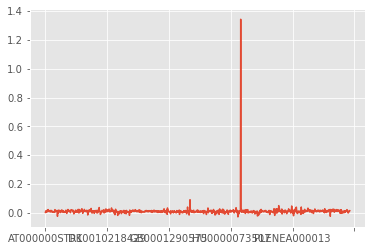

In [279]:
eu_firm_returns.mean().plot()
eu_firm_returns.mean().sort_values(ascending=False).head(5)

## Question 1
Compute and report the annualized average return and annualized volatility for all
individual assets. Compute the correlation between individual average returns and
volatility and comment on the observed correlation. (5 points)

In [280]:
(eu_firm_returns.mean() * 12).corr(eu_firm_returns.std())

0.9791372044057501

## Question 2
Form an equally-weighted and value-weighted portfolio with monthly rebalancing. Report the following statistics for both portfolios: annualized average return, annualized volatility, minimum return, maximum return, and Sharpe ratio. Plot the time series of returns for both portfolios. (10 points)


In [307]:
def portfolio_stats(weighted_returns: DataFrame):
    #weighted_returns: DataFrame = weights.mul(raw_returns)
    
    portfolio = pd.DataFrame(columns=['AAR', 'Annualized volatility', 'Min return', 'Max return', 'Sharpe ratio'])
    portfolio['AAR'] = weighted_returns.mean() * 12
    portfolio['Annualized volatility'] = weighted_returns.std() * math.sqrt(12)
    portfolio['Min return'] = weighted_returns.min()
    portfolio['Max return'] = weighted_returns.max()
    portfolio['Sharpe ratio'] = (portfolio['AAR'] - 0.03).div(portfolio['Annualized volatility'])
    
    return portfolio

### Equally weighted portfolio

AAR                          0.165047
Annualized volatility        0.492178
Min return                  -0.423203
Max return                   0.879035
Sharpe ratio            -78018.149255
dtype: object

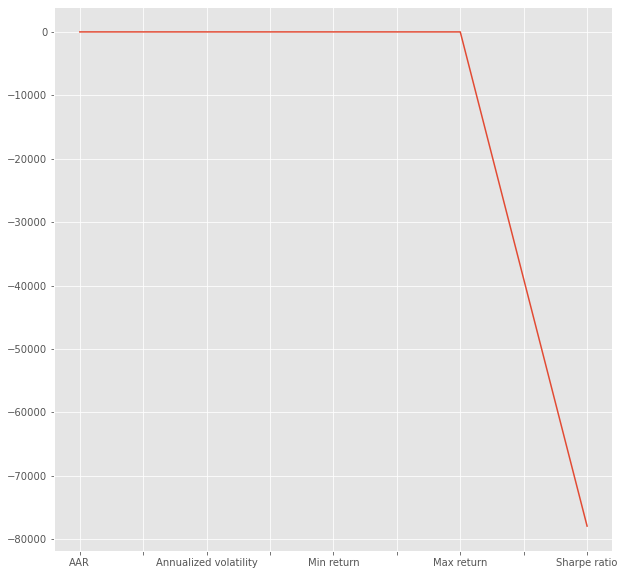

In [282]:
equal_weights_returns = pd.DataFrame(index=eu_firm_returns.index, columns=eu_firm_returns.columns)

for index, row in eu_firm_returns.iterrows():
   equal_weights_returns.loc[index] = row.div(row.count()).transpose()
   

equal_weights_portfolio_stats.plot(subplots=True, figsize=(10,10))
equal_weights_portfolio_stats = portfolio_stats(equal_weights_returns).sum()
equal_weights_portfolio_stats

In [283]:
eu_firm_market_values = market_values[eu_firm_names]

value_weights = pd.DataFrame(index=eu_firm_returns.index, columns=eu_firm_returns.columns)

for index, row in eu_firm_market_values.iterrows():
   value_weights.loc[index] = row.div(row.sum()).transpose()

value_weighted_portfolio = eu_firm_returns.mul(value_weights)
value_weighted_portfolio_stats = portfolio_stats(value_weighted_portfolio).sum()
value_weighted_portfolio_stats

AAR                           0.189984
Annualized volatility         0.431619
Min return                   -0.360371
Max return                    0.498143
Sharpe ratio            -318017.220745
dtype: object

<AxesSubplot:>

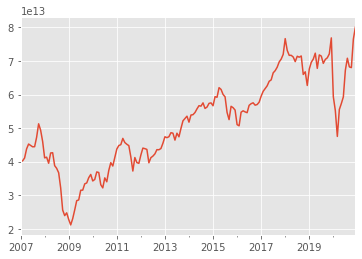

In [284]:
market_values.sum(axis=1).plot()

### Plotting Equal weighted and Value weighted portfolio.
(Correlation between returns is computed from 2007, at what point firm size data is available)

0.9442075725466111

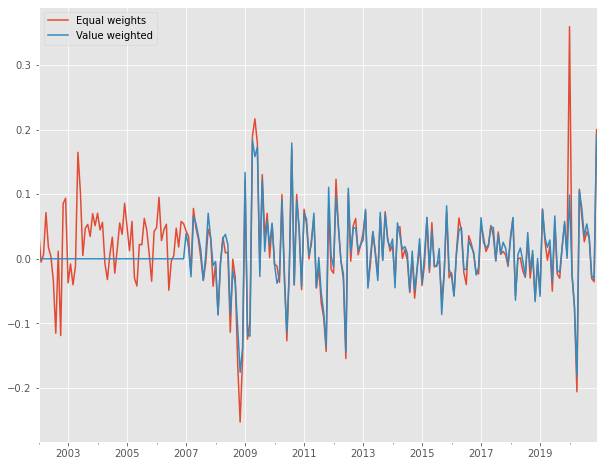

In [285]:
value_weighted_portfolio.sum(axis=1).plot(label='Value weighted', legend=True, ax=equal_weights_returns.sum(axis='columns').plot(label='Equal weights', legend=True), figsize=(10,8))
value_weighted_portfolio.sum(axis=1)[value_weighted_portfolio.index.year > 2006].corr(equal_weights_returns.sum(axis=1))

In [336]:
portfolios_question_2 = pd.concat({'Value weighted': value_weighted_portfolio_stats,
 'Equally weighted': equal_weights_portfolio_stats})
portfolios_question_2

Value weighted    AAR                           0.189984
                  Annualized volatility         0.431619
                  Min return                   -0.360371
                  Max return                    0.498143
                  Sharpe ratio            -318017.220745
Equally weighted  AAR                           0.165047
                  Annualized volatility         0.492178
                  Min return                   -0.423203
                  Max return                    0.879035
                  Sharpe ratio             -78018.149255
dtype: object

### Question 3

Supposed that you invested 100% of your wealth in the asset with the highest annualized average return computed in point 1. Compare the annualized average return and annualized volatility of this one-asset portfolio with the equally-weighted and value weighted portfolios? What explains the differences between a one-asset portfolio and a portfolio composed of many stocks? What if you invest 100% of your wealth in the asset with the highest average return computed over the first 2 years? (10 points)


In [333]:
stock = eu_firm_returns['IE00BLNN3691']
eu_firm_returns.mean().sort_values(ascending=False).head(5)

IE00BLNN3691    1.342984
GB0031718066    0.091334
NL0012969182    0.050649
PLDINPL00011    0.047950
PTBES0AM0007    0.041001
dtype: float64

In [356]:
portfolios_question_3 = pd.DataFrame({'One stockss': pd.Series({ 'AAR': stock.mean() * 12,
                                                                 'Annualized volatility': stock.std() * math.sqrt(12),
                                                                 'Min return': stock.min(),
                                                                 'Max return': stock.max(),
                                                                 'Sharpe ratio': stock.std() * math.sqrt(12) / stock.mean()
                                                                 })})
portfolios_question_3['Equally weighted'] = equal_weights_portfolio_stats
portfolios_question_3['Value weighted'] = value_weighted_portfolio_stats
portfolios_question_3

,One stockss,Equally weighted,Value weighted
AAR,16.115811,0.165047,0.189984
Annualized volatility,70.510748,0.492178,0.431619
Min return,-0.766423,-0.423203,-0.360371
Max return,307.324324,0.879035,0.498143
Sharpe ratio,52.503033,-78018.149255,-318017.220745


In [ ]:
(eu_firm_returns.groupby(eu_firm_returns.index.year).mean()*12)
